In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import random

### Create data frame

In [2]:
def get_ts(dataset_n,id,window,testortrain):    
    
    if testortrain=="train":
        df=pd.read_csv("Train_{}.csv".format(dataset_n))
    elif testortrain=="test":
        df=pd.read_csv("Test_{}.csv".format(dataset_n))
        
    df = df[df['ID']==id]
    df = df.drop(columns=['ID'])
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)

    features = df[:,0:-1]
    target = df[:,-1]

    ts_generator = TimeseriesGenerator(features,target,length=window,sampling_rate=1,batch_size=1)

    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    return(X,y,scaler,features)

### CNN model window=25

In [3]:
window=25
feature_n=13
model25=Sequential()

model25.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(window,feature_n,1)))
model25.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model25.add(Flatten())
model25.add(Dense(1, activation='linear'))

model25.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [4]:
dataset_n=1
window=25
for id in range(1,101):    
    X,y,scaler,features=get_ts(dataset_n,id,window,'train') 
    print("Training for engine "+str(id))
    model25.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Training for engine 1
Training for engine 2
Training for engine 3
Training for engine 4
Training for engine 5
Training for engine 6
Training for engine 7
Training for engine 8
Training for engine 9
Training for engine 10
Training for engine 11
Training for engine 12
Training for engine 13
Training for engine 14
Training for engine 15
Training for engine 16
Training for engine 17
Training for engine 18
Training for engine 19
Training for engine 20
Training for engine 21
Training for engine 22
Training for engine 23
Training for engine 24
Training for engine 25
Training for engine 26
Training for engine 27
Training for engine 28
Training for engine 29
Training for engine 30
Training for engine 31
Training for engine 32
Training for engine 33
Training for engine 34
Training for engine 35
Training for engine 36
Training for engine 37
Training for engine 38
Training for engine 39
Training for engine 40
Training for engine 41
Training for engine 42
Training for engine 43
Training for engine 

### CNN model window=10

In [5]:
window=10
feature_n=13
model10=Sequential()

model10.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(window,feature_n,1)))
model10.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model10.add(Flatten())
model10.add(Dense(1, activation='linear'))

model10.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [6]:
dataset_n=1
window=10
for id in range(1,101):    
    X,y,scaler,features=get_ts(dataset_n,id,window,'train') 
    print("Training for engine "+str(id))
    model10.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Training for engine 1
Training for engine 2
Training for engine 3
Training for engine 4
Training for engine 5
Training for engine 6
Training for engine 7
Training for engine 8
Training for engine 9
Training for engine 10
Training for engine 11
Training for engine 12
Training for engine 13
Training for engine 14
Training for engine 15
Training for engine 16
Training for engine 17
Training for engine 18
Training for engine 19
Training for engine 20
Training for engine 21
Training for engine 22
Training for engine 23
Training for engine 24
Training for engine 25
Training for engine 26
Training for engine 27
Training for engine 28
Training for engine 29
Training for engine 30
Training for engine 31
Training for engine 32
Training for engine 33
Training for engine 34
Training for engine 35
Training for engine 36
Training for engine 37
Training for engine 38
Training for engine 39
Training for engine 40
Training for engine 41
Training for engine 42
Training for engine 43
Training for engine 

### CNN model window=40

In [7]:
window=40
feature_n=13
model40=Sequential()

model40.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(window,feature_n,1)))
model40.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model40.add(Flatten())
model40.add(Dense(1, activation='linear'))

model40.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [8]:
dataset_n=1
window=40
for id in range(1,101):    
    X,y,scaler,features=get_ts(dataset_n,id,window,'train') 
    print("Training for engine "+str(id))
    model40.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Training for engine 1
Training for engine 2
Training for engine 3
Training for engine 4
Training for engine 5
Training for engine 6
Training for engine 7
Training for engine 8
Training for engine 9
Training for engine 10
Training for engine 11
Training for engine 12
Training for engine 13
Training for engine 14
Training for engine 15
Training for engine 16
Training for engine 17
Training for engine 18
Training for engine 19
Training for engine 20
Training for engine 21
Training for engine 22
Training for engine 23
Training for engine 24
Training for engine 25
Training for engine 26
Training for engine 27
Training for engine 28
Training for engine 29
Training for engine 30
Training for engine 31
Training for engine 32
Training for engine 33
Training for engine 34
Training for engine 35
Training for engine 36
Training for engine 37
Training for engine 38
Training for engine 39
Training for engine 40
Training for engine 41
Training for engine 42
Training for engine 43
Training for engine 

# Testing

In [9]:
#Create dataframe with X and y
def df_prediction(model,dataset_n,id,window,testortrain):
    X,y,scaler,features=get_ts(dataset_n,id,window,'test') 
    prediction=model.predict(X) 
    df =pd.concat([pd.DataFrame(features[window:]),pd.DataFrame(prediction)],axis=1)
    df = scaler.inverse_transform(df)
    df =pd.DataFrame(df)
    return(df)

RMSE with window of 10 samples: 3.4605012291369817
RMSE with window of 25 samples: 3.2668823559488045
RMSE with window of 40 samples: 5.6104097336007674


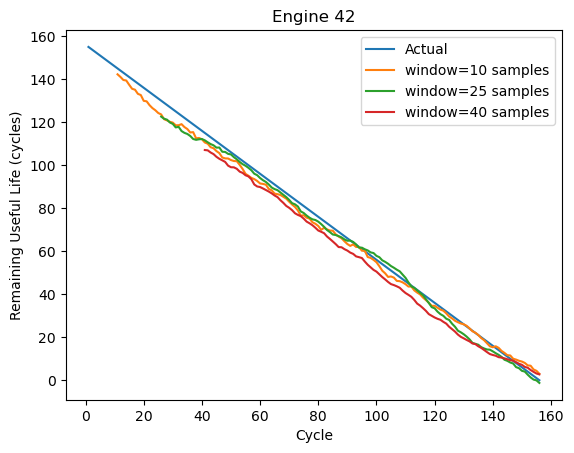

In [11]:
#Selecting random engine
id = random.randint(1,100)
df_prediction10=df_prediction(model10,dataset_n,id,10,'test')
df_prediction25=df_prediction(model25,dataset_n,id,25,'test')
df_prediction40=df_prediction(model40,dataset_n,id,40,'test')

df=pd.read_csv("Test_{}.csv".format(dataset_n))
df = df[df['ID']==id]
df_actual = df.drop(columns=['ID'])

print('RMSE with window of 10 samples:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][10:],df_prediction10[13])))
print('RMSE with window of 25 samples:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][25:],df_prediction25[13])))
print('RMSE with window of 40 samples:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][40:],df_prediction40[13])))

plt.plot(df_actual['Cycle'],df_actual['RUL'])
plt.plot(df_prediction10[0],df_prediction10[13])
plt.plot(df_prediction25[0],df_prediction25[13])
plt.plot(df_prediction40[0],df_prediction40[13])
plt.ylabel('Remaining Useful Life (cycles)')
plt.xlabel('Cycle')
plt.title('Engine {}'.format(id))
plt.legend([ 'Actual','window=10 samples','window=25 samples','window=40 samples'], loc='upper right')
plt.show()
print('\n')